# Introduction 

## Section 0: Setup of Workbench Space

To start this practical, we first must setup our workbench space within Qwiki-labs environment, this is a step one will not need to complete within the IDS environment, however for today's practical we will. For this we can follow the steps highlighted in Task 1 of the Lab. 

When we've followed all those steps, and we've reached Task 2, we can then import this repo from git, using the command

<code> !git clone https://github.com/wisejthomas/ids_deepdive_demo </code>

This will import this practical and demo into this workspace! 

### Important Definitions 

At this point, it is important to cover a few critical definitions:

- **BigQuery** BigQuery is a fully managed, AI-ready data platform that helps you manage and analyze your data with built-in features like machine learning, search, geospatial analysis, and business intelligence. BigQuery's serverless architecture lets you use languages like SQL and Python to answer your organization's biggest questions with zero infrastructure management.

- **JupyterLab** JupyterLab is a highly extensible, feature-rich notebook authoring application and editing environment, and is a part of Project Jupyter, a large umbrella project centered around the goal of providing tools (and standards) for interactive computing with computational notebooks.

- **Vertex AI Workbench instance** Vertex AI Workbench instances are Jupyter notebook-based development environments on Google Cloud for the entire data science workflow. Vertex AI Workbench instances are prepackaged with JupyterLab. Vertex AI Workbench instances have integrations and features can make it easier to access your data, process data faster, schedule notebook runs, and more.

For most of these methods, we will use a Python JupyterLab Kernel. In the Jupyter architecture, kernels are separate processes started by the server that run your code in different programming languages and environments. We will use the IPython Jupyter Kernel that comes prepackaged with Vertex AI Workbench Instances. This will allow us to execute Python code in this notebook interactively.


## Section 1: Navigating Data in BigQuery Studio 

To explore that data available to you within your project space, we can use the BigQuery Studio space. This is a UI on Google Cloud, which allows your to view information such as column names and descriptions, as well as a preview of the data. 

To access this UI you can select this link 
- Link: https://console.cloud.google.com/bigquery 
- Navigate via the UI to BigQuery >> Studio

Here we can begin to explore the public data, in particular, the London Fire Brigade call outs in 2017. We can explore this data by following these steps: 

- Select project "bigquery-public-data" (if you don't see it, don't panic, just search for "*London*" in the search bar and it should appear!)
    - Locate and select the dataset: "london_fire_brigade"
        - Select table: "fire_brigade_service_calls"
            - We can then preview a sample of this table, as well as view information such as column descriptions.

## Section 2: Introducing Jupyter Lab for Python 



### Section 2a: Package Setup and Installation

In [1]:
# Install a pip package in the current Jupyter kernel
# here the package is bigframes https://pypi.org/project/bigframes/
import sys
!{sys.executable} -m pip install bigframes | grep -v 'already satisfied'

import bigframes.pandas as bpd
import matplotlib.pyplot as plt

# import warnings filter & ignore all future warnings
# this is for teaching purposes only, to avoid FutureWarnings to do with bigframe compiler implementation
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


## Section 3: Supercharging Python with "BigFrames"

### Section 3a: Load in Data
For today's demonstration we will be exploring the Google Dataset around London Fire Brigade call outs in 2017. This dataset has been selected due to its similarity in variable type to the data. 


In [2]:
# Load data from BigQuery
print("step 1-of-3 :: loading data from BigQuery")
query_or_table = "bigquery-public-data.london_fire_brigade.fire_brigade_service_calls"
bq_df = bpd.read_gbq(query_or_table, use_cache=False)

step 1-of-3 :: loading data from BigQuery


In [3]:
# Lets double check our column names 
list(bq_df)

['incident_number',
 'date_of_call',
 'cal_year',
 'time_of_call',
 'hour_of_call',
 'timestamp_of_call',
 'incident_group',
 'stop_code_description',
 'special_service_type',
 'property_category',
 'property_type',
 'address_qualifier',
 'postcode_full',
 'postcode_district',
 'borough_code',
 'borough_name',
 'proper_case',
 'ward_code',
 'ward_name',
 'ward_name_new',
 'easting_m',
 'northing_m',
 'easting_rounded',
 'northing_rounded',
 'frs',
 'incident_station_ground',
 'first_pump_arriving_attendance_time',
 'first_pump_arriving_deployed_from_station',
 'second_pump_arriving_attendance_time',
 'second_pump_arriving_deployed_from_station',
 'num_stations_with_pumps_attending',
 'num_pumps_attending']

### Section 3b: Using Magic Commands to Manipulate Data
In order to improve the effeciency of writting queries and performing particular tasks, BigQuery has developed "cell magics" to make it easy to execute SQL queries. There are two BigQuery "cell magics": 

> %%bigquery
- Behind the scenes, the %%bigquery magic command uses the BigQuery client library for Python to run the given query
- Then convert the results to a pandas DataFrame
- Then display results.

> %%bigquery my_pandas_data_frame
- Behind the scenes, the %%bigquery magic command uses the BigQuery client library for Python to run the given query
- Then convert the results to a pandas DataFrame
- Then save the pandas DataFrame to the variable my_pandas_data_frame

Let us first of all consider, how many call outs, for the fire service were made by hour during 2017. We can assign this to the data frame *hour_of_call_incident_count* - we will come back to this later when we look to visualise these results! 

In [10]:
%%bigquery hour_of_call_incident_count
SELECT 
    hour_of_call,
    COUNT(DISTINCT incident_number) as incident_number_count
FROM 
    bigquery-public-data.london_fire_brigade.fire_brigade_service_calls
GROUP BY 
    hour_of_call
ORDER BY 
    hour_of_call ASC;


Query is running:   0%|          |

Downloading:   0%|          |

In [11]:
# In the meantime however, we can view the first five hours of the day!
hour_of_call_incident_count.head()

,hour_of_call,incident_number_count
0,0,976
1,1,879
2,2,645
3,3,549
4,4,485


### Section 3c: Basic Descriptive Statistics

### Section 3d: Building Cross Tabs 

## Section 4: Visualising your Data in Python
Lets return to our number of incident per hour, from Section 3b. Lets plot this using matplotlib.

When using matplotlib we can simply highlight our X and Y variables respectively. In this case, we would like to create a bar plot, between the "hour of calls" and the "number of incidents" in that time. 

Text(0.5, 1.0, 'Number of Incidents recorded per Hour')

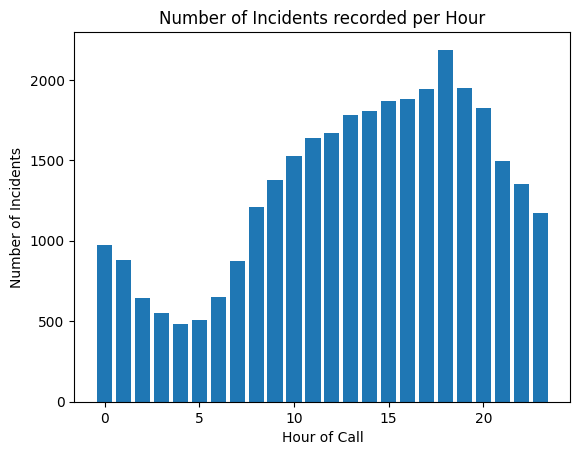

In [14]:
# Bar Chart Call X = Hour of Call, Y = Incident Number Count 
plt.bar(hour_of_call_incident_count.hour_of_call, hour_of_call_incident_count.incident_number_count)
# Label our X and Y axis and Title 
plt.xlabel('Hour of Call')
plt.ylabel('Number of Incidents')
plt.title('Number of Incidents recorded per Hour')